In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# loading the iris data
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# creating dataframes
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# adding target_column
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# adding the flower names in the target columns
df['flower_names']=df.target.apply(lambda x:iris.target_names[x])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# from 0 to 50->setosa ,50 to 100 -> verginica and 100 to above ->versicolor
df0=df[:50]
df1=df[50:100]
df2=df[100:]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'sepal width')

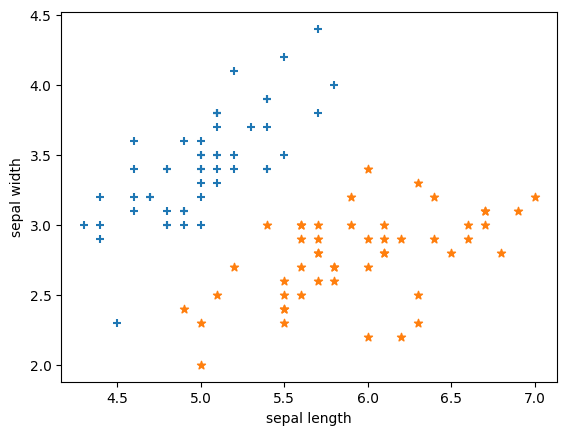

In [11]:
# scatterplot
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*')

plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

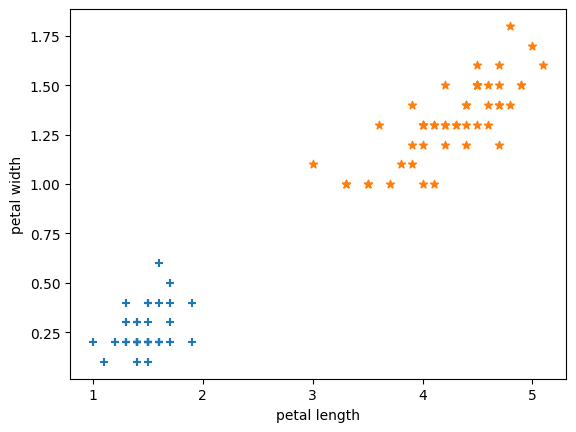

In [12]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [13]:
# splitting x and y from dataframe
x=df.drop(['target','flower_names'],axis=1)
y=df.target

In [14]:
# splitting x and y in training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
x_train.shape

(120, 4)

In [16]:
x_test.shape

(30, 4)

In [17]:
# import model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

In [18]:
# model fitting and prediction
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [19]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

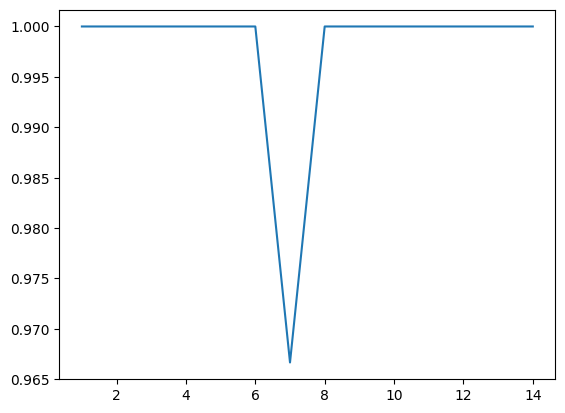

In [20]:
# calculation of the neighbors
wcss=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    wcss.append(accuracy_score(y_test,y_pred))
plt.plot(range(1,15),wcss)

In [21]:
# prediction on new data
knn.predict([[6.5,2.8,4.6,1.5]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
# prediction on new data
predicted_class=knn.predict([[6.5,2.8,4.6,1.5]])
print(df['flower_names'].iloc[predicted_class])

1    setosa
Name: flower_names, dtype: object


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
# calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 25.722222222222214, 'predicted')

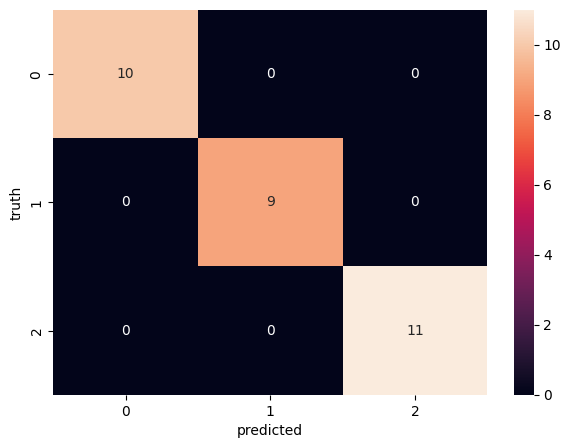

In [24]:
# heatmap of the confusion matrix
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.ylabel("truth")
plt.xlabel("predicted")

In [25]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



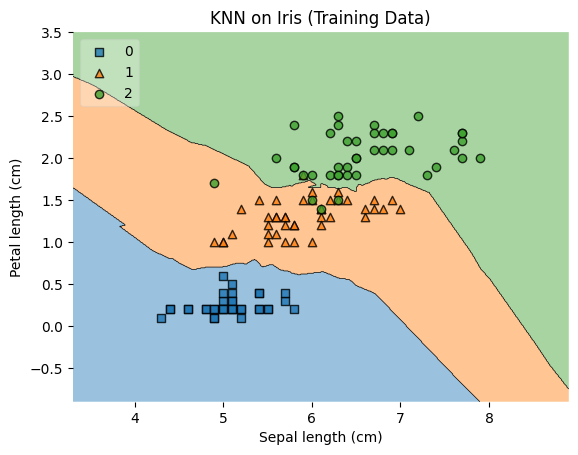

In [35]:
# Plotting decision regions using training data
# x_train=x_train[]
# y_train=y_train
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('KNN on Iris (Training Data)')
plt.show()


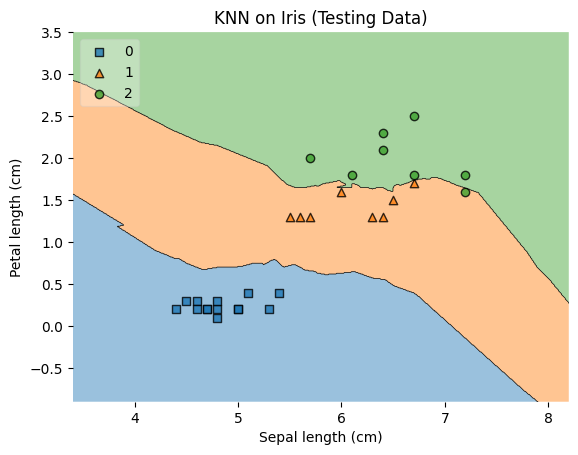

In [36]:
# Plotting decision regions using testing data

plot_decision_regions(x_test, y_test, clf=knn, legend=2)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('KNN on Iris (Testing Data)')
plt.show()